# Intensity Waterfall Tutorial

:::{seealso}
This notebook can be downloaded as **{nb-download}`waterfall.ipynb`**.
:::

:::{warning}
This notebook was run using **pulsarbat v0.0.9** and may be out-dated.
:::

We start by loading some intensity data from PSR B1257+12 taken at Arecibo on MJD 58140.

## Myst-NB Testing

Testing some syntax things

### Latex

\begin{equation}
\frac {\partial u}{\partial x} + \frac{\partial v}{\partial y} = - \, \frac{\partial w}{\partial z}
\end{equation}

### Remove Cell

In [1]:
print("Don't show this cell")

Don't show this cell


### Remove Input

In [2]:
print("Don't show this input")

Don't show this input


### Remove Output

In [3]:
print("Don't show this output")

Don't show this output


### Hide Cell

In [4]:
print("Please, hide this cell")

Please, hide this cell


### Hide Input

In [5]:
print("Please, hide this input")

Please, hide this input


### Hide Output

In [6]:
print("Please, hide this output")

Please, hide this output


### Table

:::{note}
This text is **standard** _Markdown_
:::

:::{table} This is a **standard** _Markdown_ title
:align: center
:widths: grid

abc | mnp | xyz
--- | --- | ---
123 | 456 | 789
:::

## Waterfalls

In [7]:
import pulsarbat as pb
import pickle

with open("B1257+12_58140.pb", 'rb') as f:
    x = pickle.load(f)[:, 25:-25]
    
print(x)

IntensitySignal @ 0x7f54ab731a80
--------------------------------
Data Container: numpy.ndarray<shape=(1818000, 750, 2), dtype=float32>
Sample rate: 0.00025 MHz
Time length: 7272.0 s
Start time: 2018-01-22T08:15:45.000000000
Channel Bandwidth: 0.125 MHz
Total Bandwidth: 93.75 MHz
Center Frequency: 325.4375 MHz



## Passband shape

We can plot the time-averaged intensity to see the passband shape, caused by the analog bandpass filter and the subsequently applied polyphase filter.

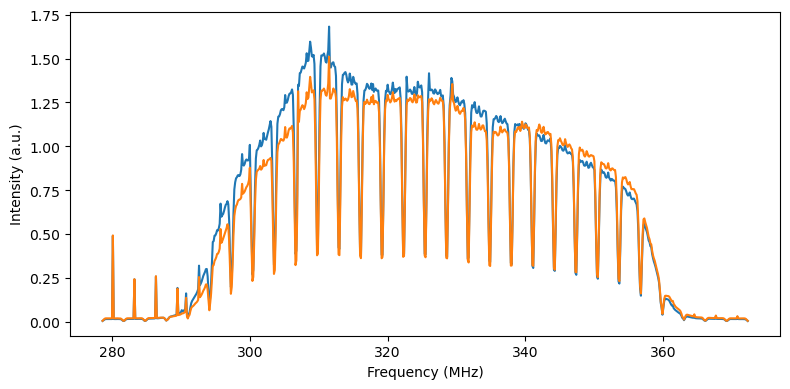

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4), tight_layout=True)
plt.plot(x.channel_freqs, x.data.mean(0))
plt.xlabel("Frequency (MHz)")
plt.ylabel("Intensity (a.u.)")
plt.show()

## Transient RFI

Sometimes, we see transient radio-frequency interference.

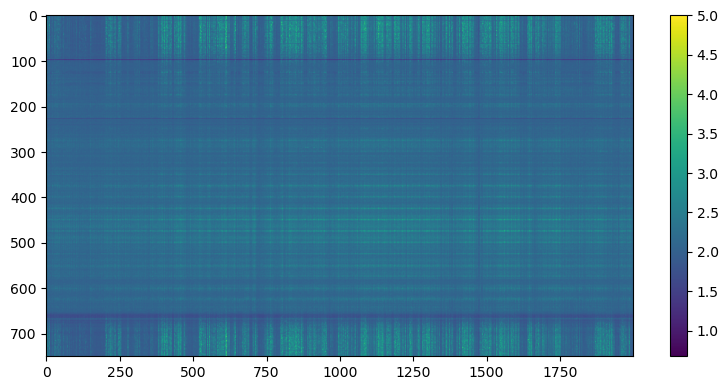

In [9]:
y = x.data[178000:180000] / x.data.mean(0, keepdims=True)

plt.figure(figsize=(8, 4), tight_layout=True)
plt.imshow(y.sum(-1).T, aspect='auto', vmax=5)
plt.colorbar()
plt.show()

## Pandas DF

In [10]:
import string

import numpy as np
import pandas as pd

rng = np.random.default_rng()
data = rng.standard_normal((100, 4))
df = pd.DataFrame(data, columns=list(string.ascii_lowercase)[:4])
df

,a,b,c,d
0,0.855732,0.123159,-0.763666,-1.375501
1,-0.054659,-1.555403,0.444208,-0.032068
2,-0.626634,0.772305,-0.520945,0.357168
3,0.599116,-0.376515,0.809793,0.405551
4,-0.289487,-1.546045,-1.785013,-0.634881
...,...,...,...,...
95,0.186629,0.149888,1.481666,1.469168
96,-0.604168,1.626352,0.803491,-0.935029
97,0.348830,1.483411,0.771016,-0.431035
98,-1.295420,0.111124,0.431958,0.690713


## Conclusion

RFI is annoying.